# **1. Import Library**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-pastel')

# **2. Load Dataset**

In [11]:
df = pd.read_csv('heart.csv')

print("5 BARIS PERTAMA DATASET:")
print(df.head())

print("\nINFORMASI DATASET:")
df.info()

print("\nSTATISTIK DESKRIPTIF:")
print(df.describe())

print("\nJUMLAH MISSING VALUES PER KOLOM:")
print(df.isnull().sum())

5 BARIS PERTAMA DATASET:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

INFORMASI DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int

# 3. **Exploratory Data Analysis (EDA)**

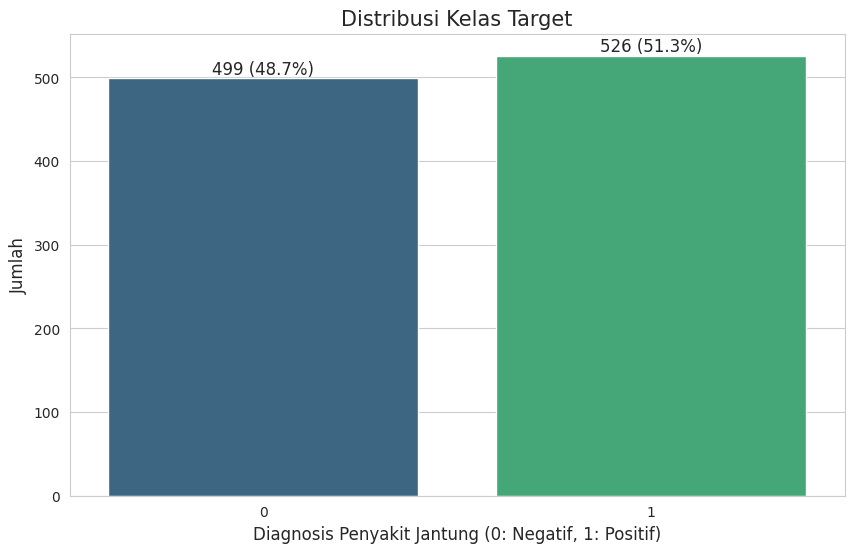

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribusi Kelas Target', fontsize=15)
plt.xlabel('Diagnosis Penyakit Jantung (0: Negatif, 1: Positif)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width()/2, height + 5,
            f'{int(height)} ({percentage:.1f}%)',
            ha='center', fontsize=12)

plt.show()

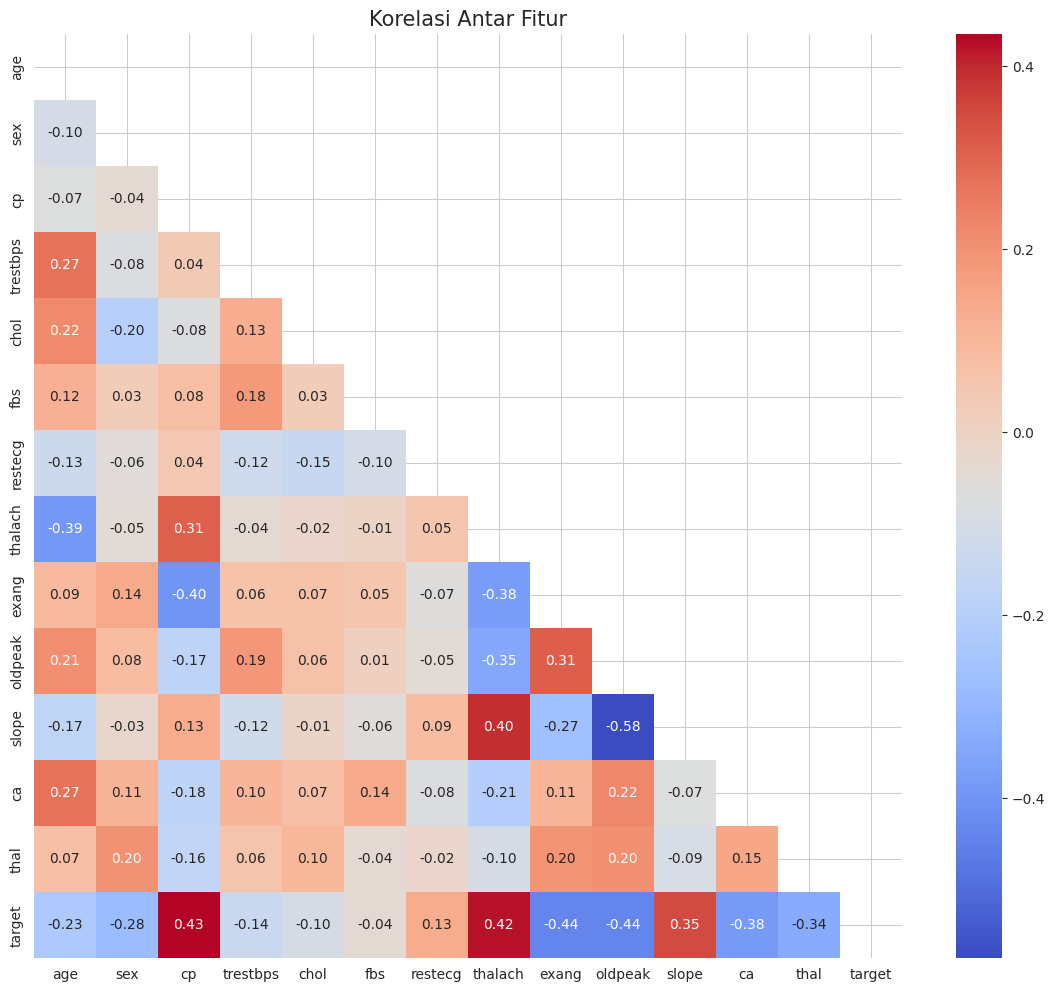

In [15]:
plt.figure(figsize=(14, 12))
correlation = df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Korelasi Antar Fitur', fontsize=15)
plt.show()

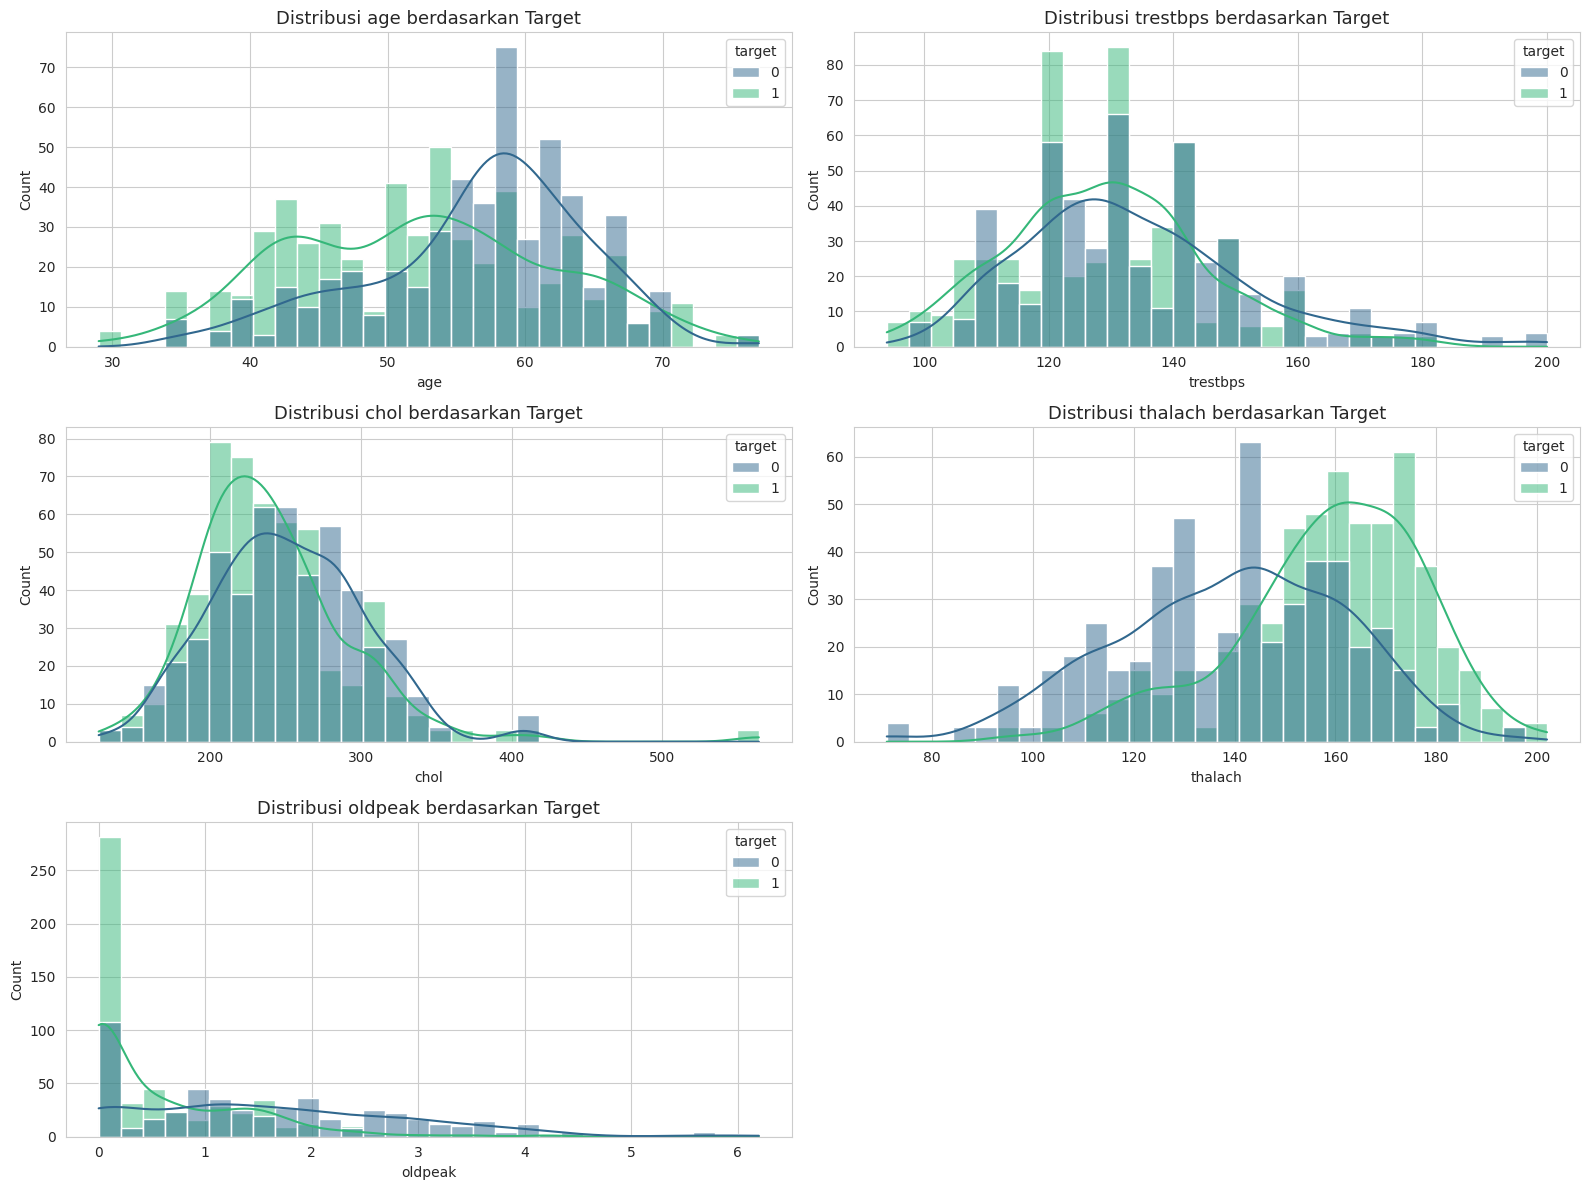

In [16]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=feature, hue='target', kde=True, bins=30, palette='viridis')
    plt.title(f'Distribusi {feature} berdasarkan Target', fontsize=13)
plt.tight_layout()
plt.show()

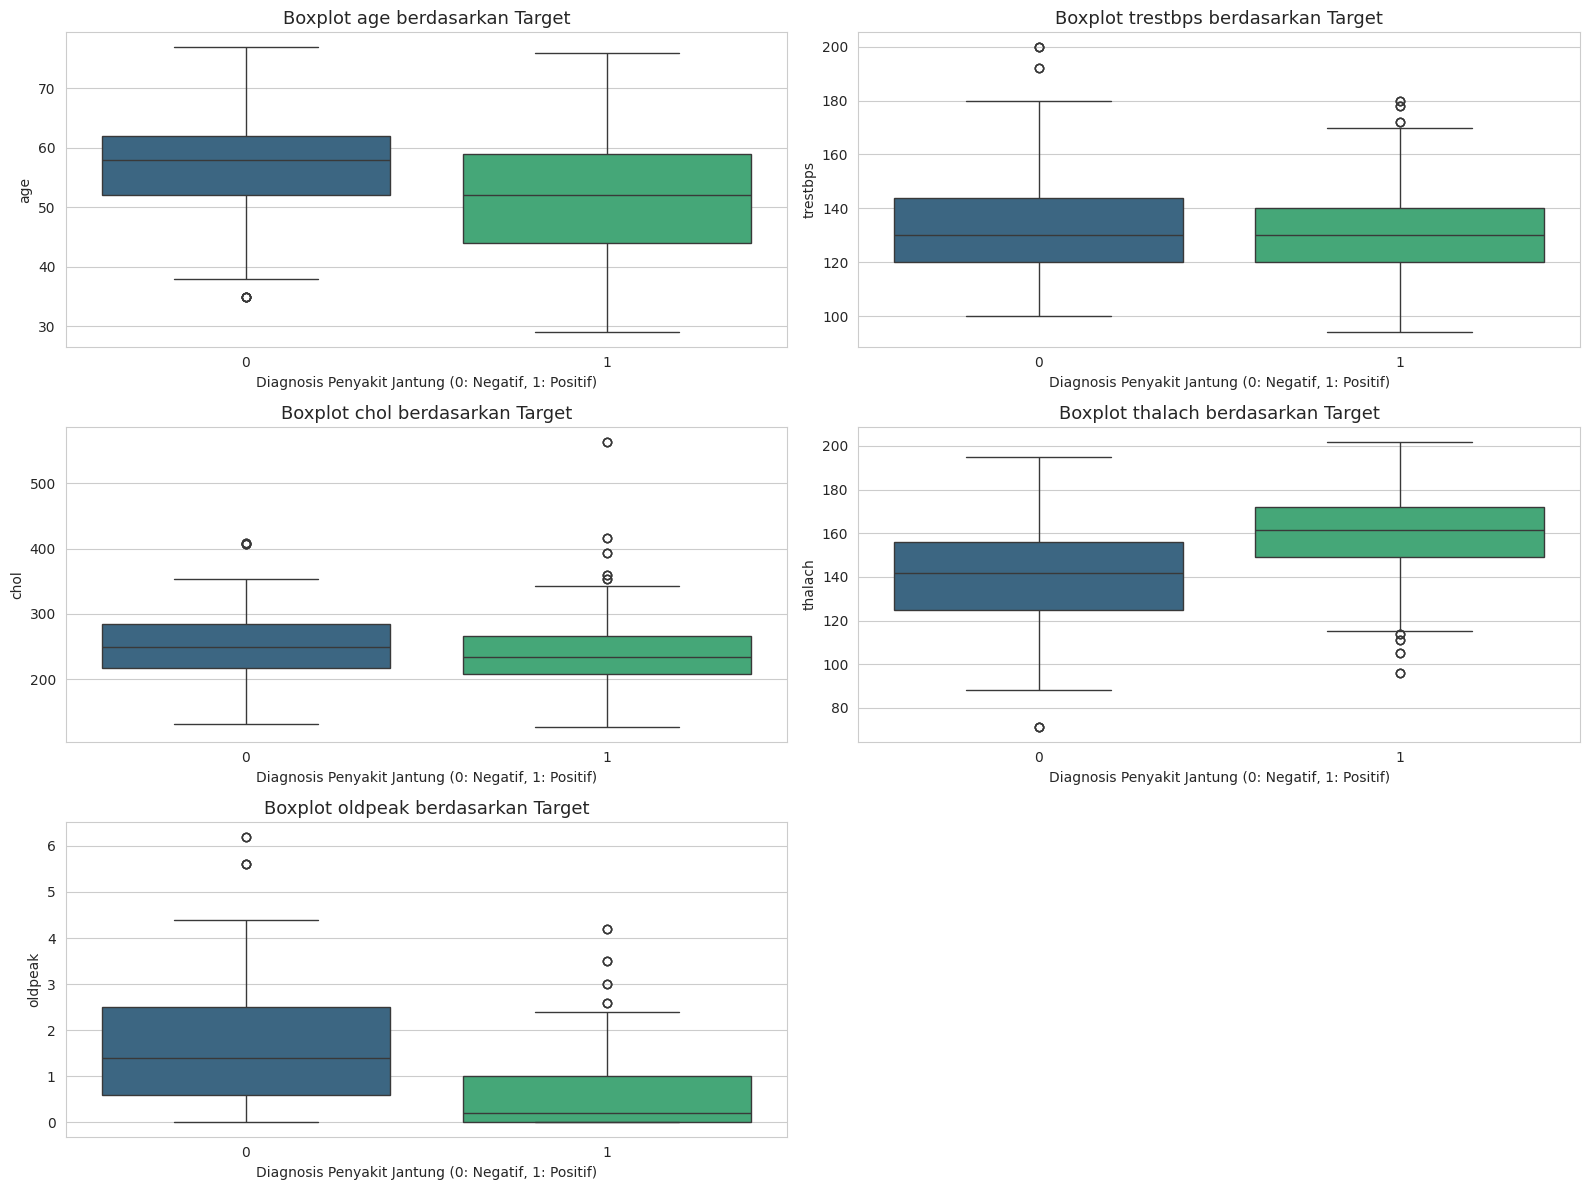

In [17]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='target', y=feature, data=df, palette='viridis')
    plt.title(f'Boxplot {feature} berdasarkan Target', fontsize=13)
    plt.xlabel('Diagnosis Penyakit Jantung (0: Negatif, 1: Positif)', fontsize=10)
plt.tight_layout()
plt.show()

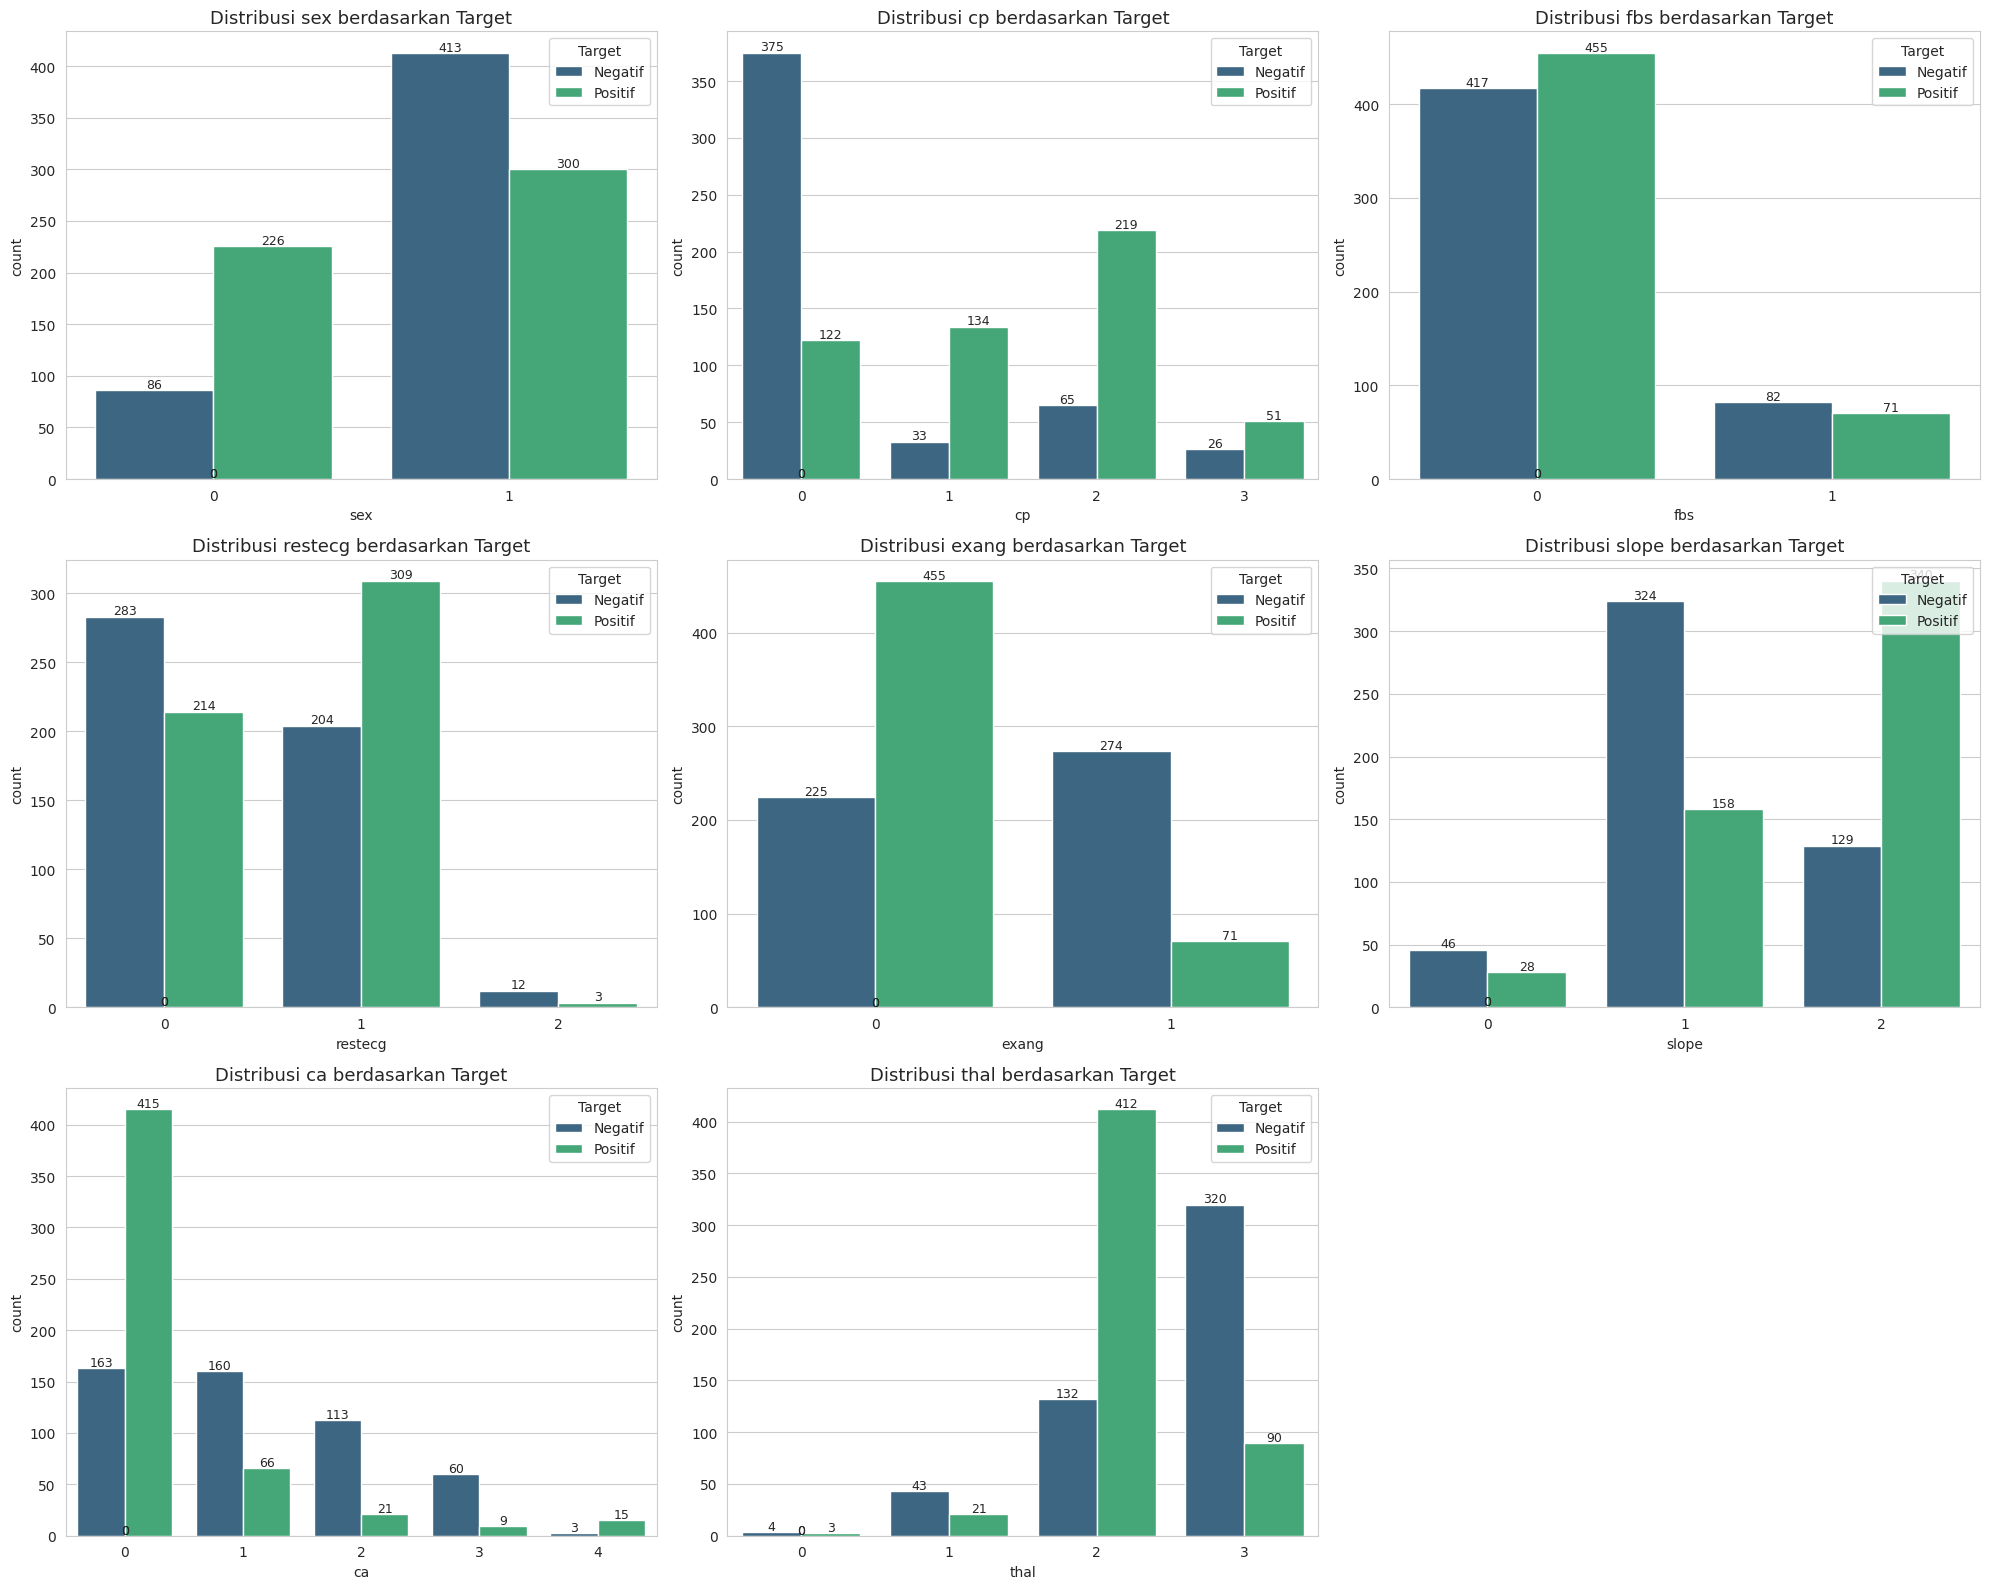

In [18]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(20, 16))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    ax = sns.countplot(x=feature, hue='target', data=df, palette='viridis')
    plt.title(f'Distribusi {feature} berdasarkan Target', fontsize=13)
    plt.xlabel(f'{feature}', fontsize=10)
    plt.legend(title='Target', loc='upper right', labels=['Negatif', 'Positif'])

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 2,
                f'{int(height)}',
                ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [19]:
print("\nANALISIS BIVARIATE UNTUK VARIABEL KATEGORIKAL:")
for feature in categorical_features:
    print(f"\nCrosstab untuk {feature}:")
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    print(crosstab)
    print("\nPersentase penyakit jantung berdasarkan kategori:")
    print(crosstab[1].sort_values(ascending=False))


ANALISIS BIVARIATE UNTUK VARIABEL KATEGORIKAL:

Crosstab untuk sex:
target          0          1
sex                         
0       27.564103  72.435897
1       57.924264  42.075736

Persentase penyakit jantung berdasarkan kategori:
sex
0    72.435897
1    42.075736
Name: 1, dtype: float64

Crosstab untuk cp:
target          0          1
cp                          
0       75.452716  24.547284
1       19.760479  80.239521
2       22.887324  77.112676
3       33.766234  66.233766

Persentase penyakit jantung berdasarkan kategori:
cp
1    80.239521
2    77.112676
3    66.233766
0    24.547284
Name: 1, dtype: float64

Crosstab untuk fbs:
target          0          1
fbs                         
0       47.821101  52.178899
1       53.594771  46.405229

Persentase penyakit jantung berdasarkan kategori:
fbs
0    52.178899
1    46.405229
Name: 1, dtype: float64

Crosstab untuk restecg:
target           0          1
restecg                      
0        56.941650  43.058350
1        39.7

<Figure size 1600x1200 with 0 Axes>

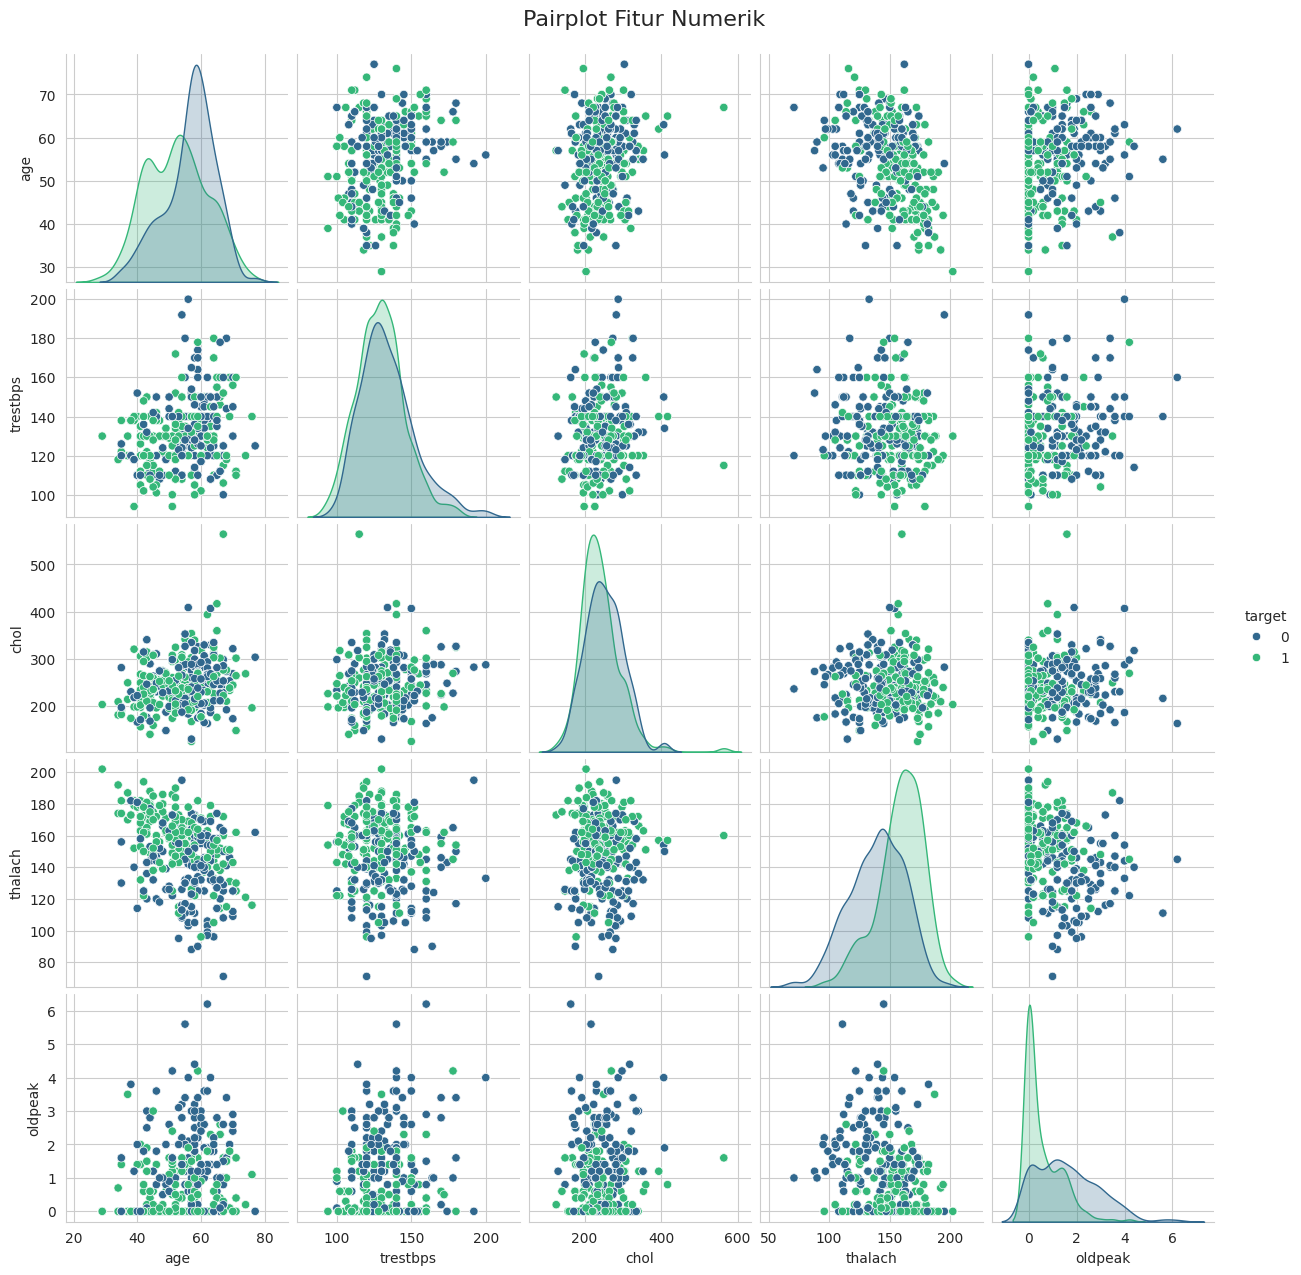

In [20]:
plt.figure(figsize=(16, 12))
sns.pairplot(df[numeric_features + ['target']], hue='target', palette='viridis')
plt.suptitle('Pairplot Fitur Numerik', y=1.02, fontsize=16)
plt.show()

# **4. Data Preparation**

In [21]:
X = df.drop('target', axis=1)
y = df['target']

In [22]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [23]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nINFORMASI SPLITTING DATA:")
print(f"Ukuran data training: {X_train.shape}")
print(f"Ukuran data testing: {X_test.shape}")
print(f"Distribusi target di data training: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Distribusi target di data testing: {pd.Series(y_test).value_counts().to_dict()}")


INFORMASI SPLITTING DATA:
Ukuran data training: (820, 13)
Ukuran data testing: (205, 13)
Distribusi target di data training: {1: 421, 0: 399}
Distribusi target di data testing: {1: 105, 0: 100}


# **5. Modeling**

In [26]:
def evaluate_model(model, X_test, y_test, model_name, plot=True):

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"\n--- PERFORMA MODEL {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    if plot:
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {model_name}', fontsize=15)
        plt.xlabel('Predicted', fontsize=12)
        plt.ylabel('Actual', fontsize=12)

        group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
        labels = np.asarray(labels).reshape(2, 2)
        for i in range(2):
            for j in range(2):
                plt.text(j+0.3, i+0.15, labels[i, j],
                        fontsize=12, color='black')

        plt.show()

        plt.figure(figsize=(8, 6))
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC Curve - {model_name}', fontsize=15)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }


====== MODEL 1: LOGISTIC REGRESSION ======

--- PERFORMA MODEL Logistic Regression ---
Accuracy: 0.8732
Precision: 0.8559
Recall: 0.9048
F1 Score: 0.8796
ROC AUC: 0.9445

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



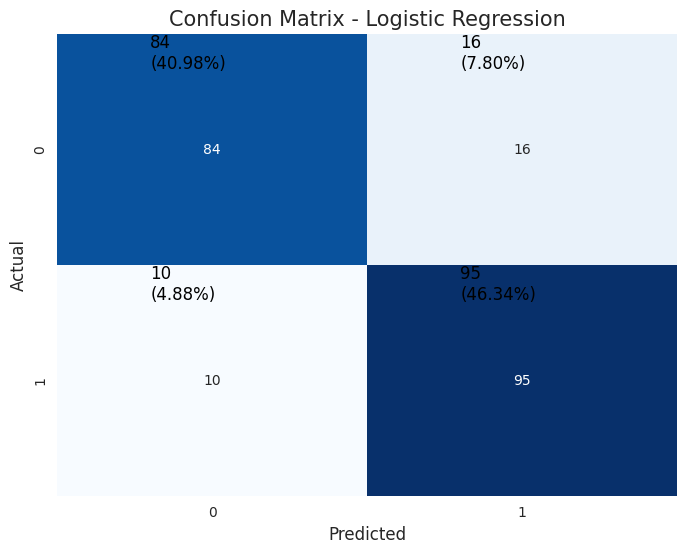

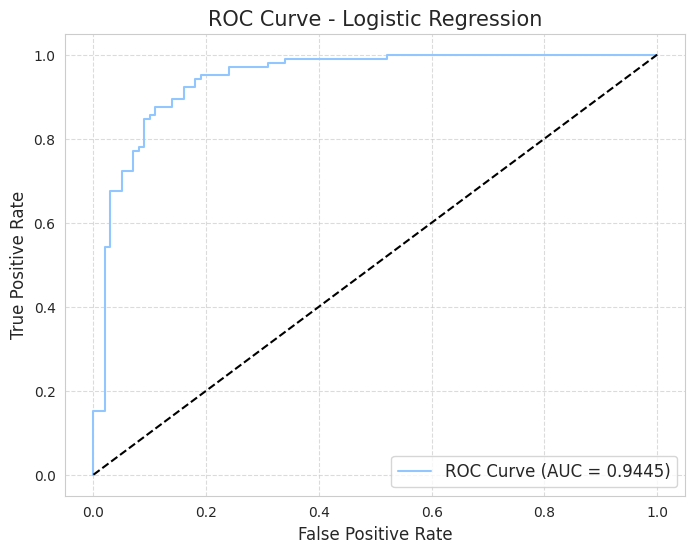

In [27]:
print("\n====== MODEL 1: LOGISTIC REGRESSION ======")
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])
lr_pipeline.fit(X_train, y_train)
lr_metrics = evaluate_model(lr_pipeline, X_test, y_test, "Logistic Regression")


====== MODEL 2: RANDOM FOREST ======

--- PERFORMA MODEL Random Forest ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



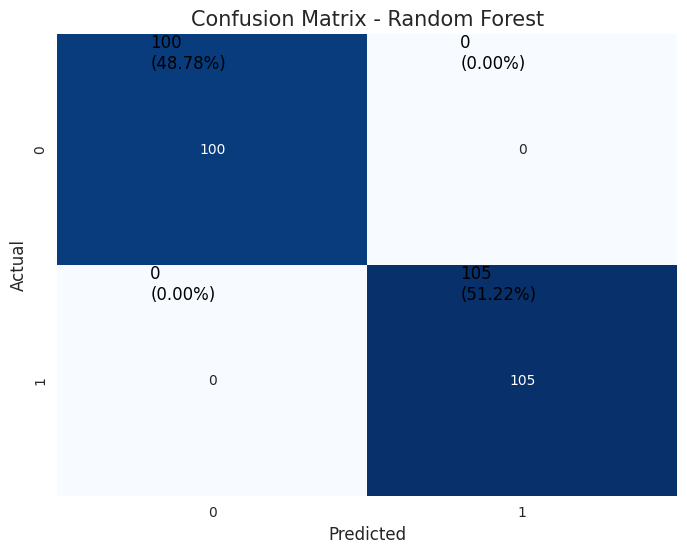

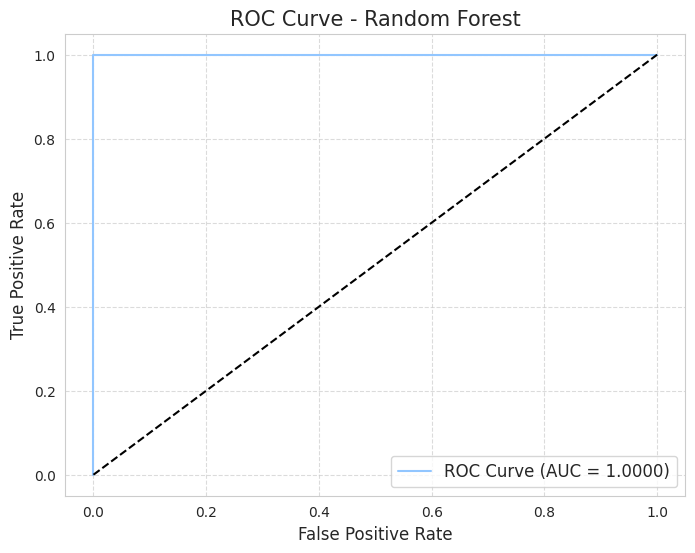

In [28]:
print("\n====== MODEL 2: RANDOM FOREST ======")
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_pipeline, X_test, y_test, "Random Forest")


====== MODEL 3: GRADIENT BOOSTING ======

--- PERFORMA MODEL Gradient Boosting ---
Accuracy: 0.9902
Precision: 0.9813
Recall: 1.0000
F1 Score: 0.9906
ROC AUC: 0.9931

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.98      1.00      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



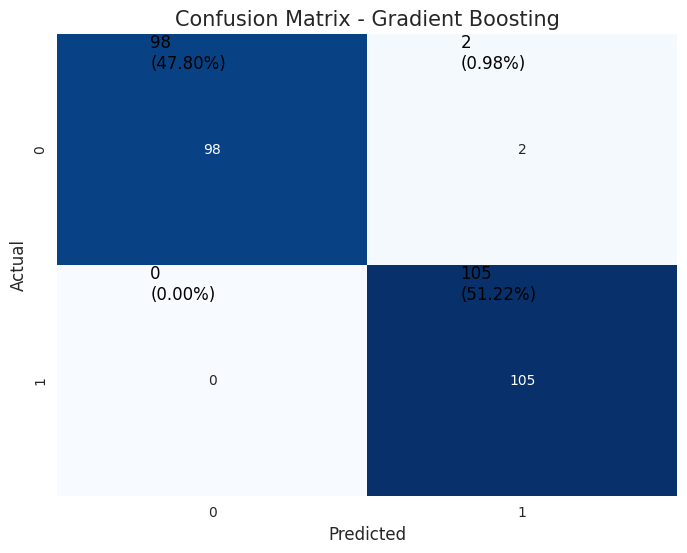

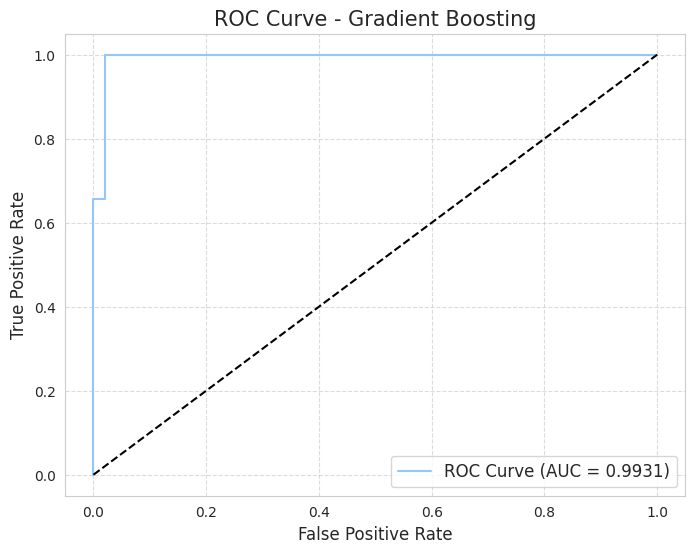

In [29]:
print("\n====== MODEL 3: GRADIENT BOOSTING ======")
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
gb_pipeline.fit(X_train, y_train)
gb_metrics = evaluate_model(gb_pipeline, X_test, y_test, "Gradient Boosting")


====== MODEL 4: SUPPORT VECTOR MACHINE ======

--- PERFORMA MODEL Support Vector Machine ---
Accuracy: 0.9512
Precision: 0.9358
Recall: 0.9714
F1 Score: 0.9533
ROC AUC: 0.9773

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       100
           1       0.94      0.97      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



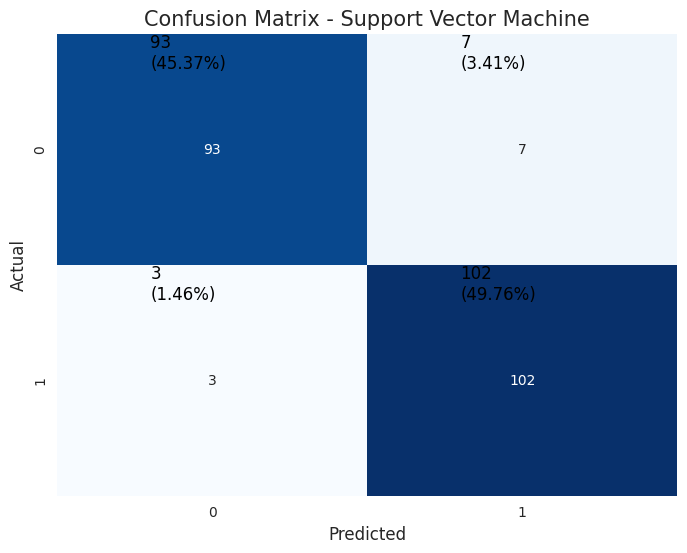

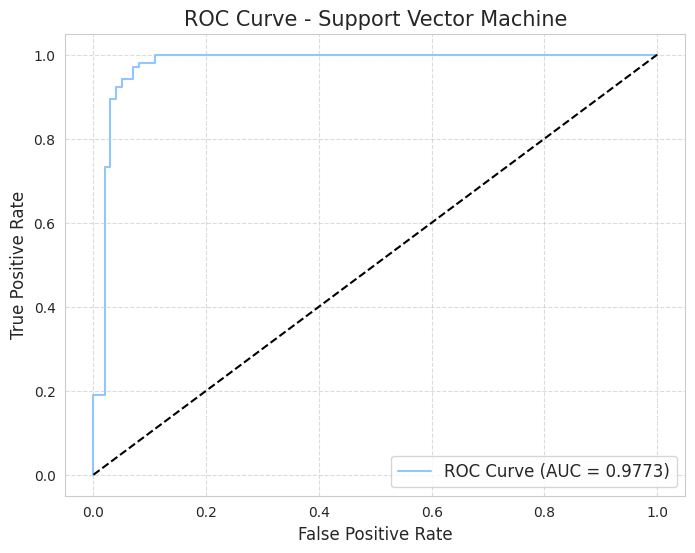

In [30]:
print("\n====== MODEL 4: SUPPORT VECTOR MACHINE ======")
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])
svm_pipeline.fit(X_train, y_train)
svm_metrics = evaluate_model(svm_pipeline, X_test, y_test, "Support Vector Machine")


====== HYPERPARAMETER TUNING: RANDOM FOREST ======
Melakukan grid search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Grid search selesai!

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best ROC AUC score: 0.9986011904761904

--- PERFORMA MODEL Random Forest (Tuned) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



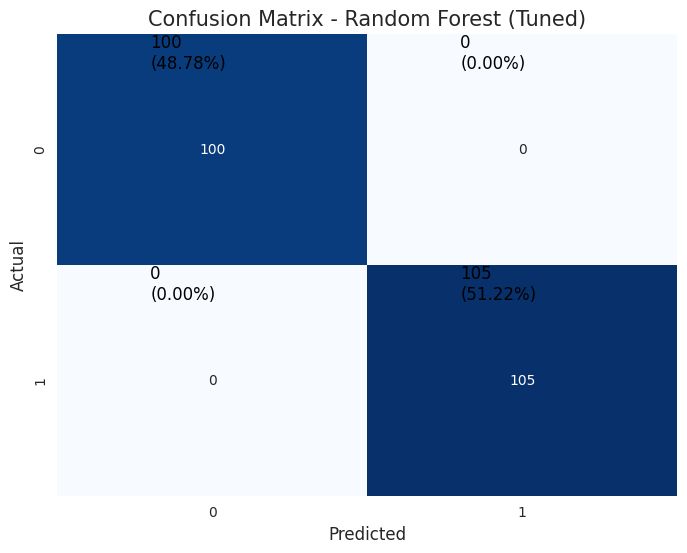

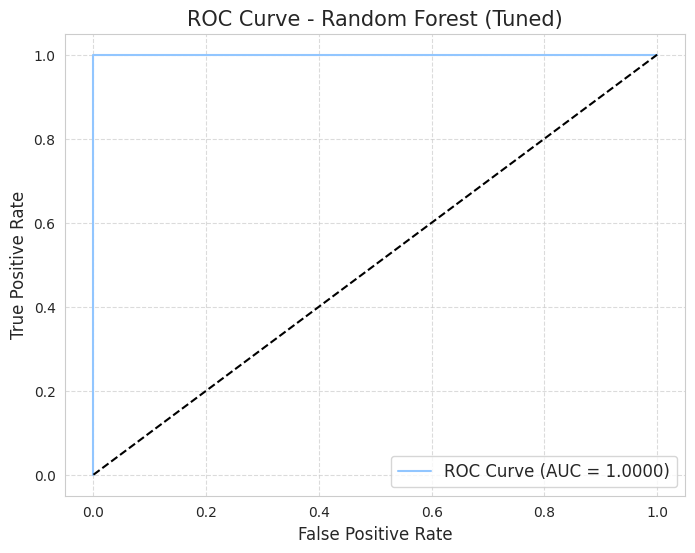

In [31]:
print("\n====== HYPERPARAMETER TUNING: RANDOM FOREST ======")
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Cross-validation untuk hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("Melakukan grid search...")
grid_search.fit(X_train, y_train)
print("Grid search selesai!")
print("\nBest parameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)

# Evaluasi model terbaik hasil tuning
best_model = grid_search.best_estimator_
best_metrics = evaluate_model(best_model, X_test, y_test, "Random Forest (Tuned)")


====== ANALISIS FEATURE IMPORTANCE ======


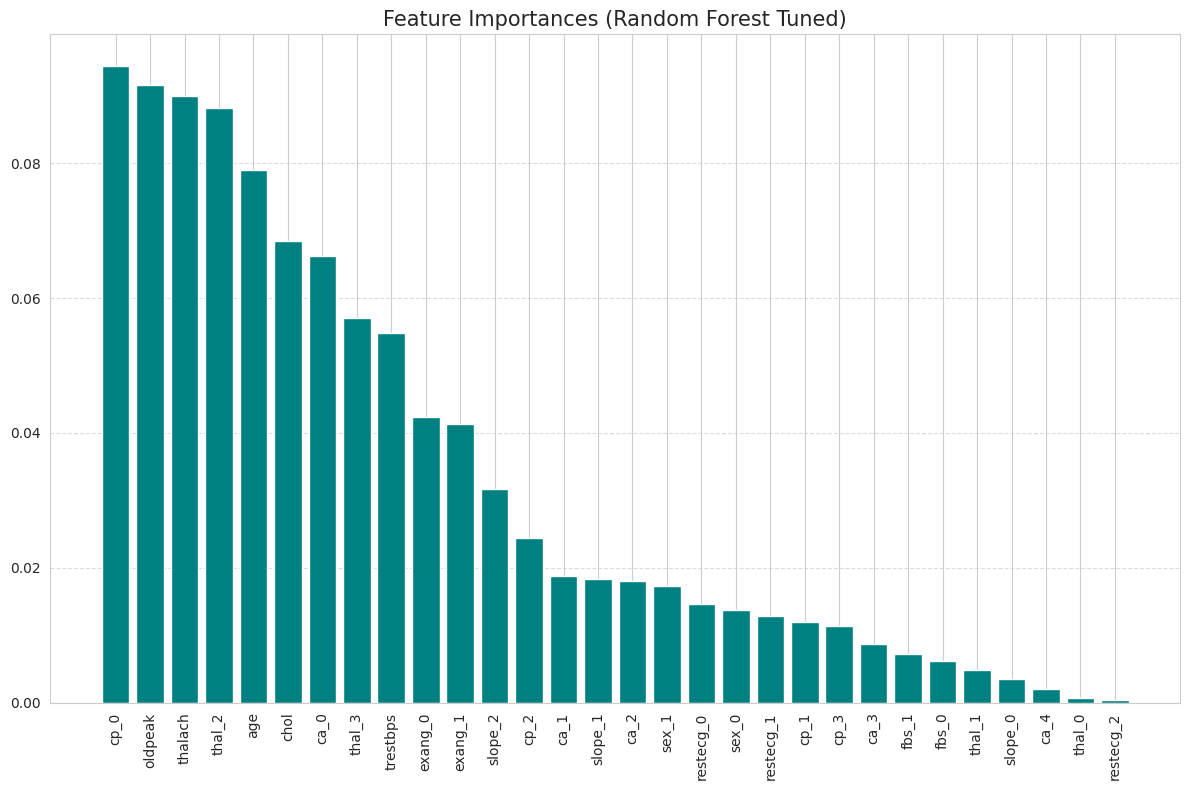


Top 10 fitur paling penting:
1. cp_0: 0.0944
2. oldpeak: 0.0916
3. thalach: 0.0899
4. thal_2: 0.0882
5. age: 0.0790
6. chol: 0.0684
7. ca_0: 0.0662
8. thal_3: 0.0570
9. trestbps: 0.0549
10. exang_0: 0.0424


In [32]:
print("\n====== ANALISIS FEATURE IMPORTANCE ======")

# Fit preprocessor untuk mendapatkan nama fitur setelah transformasi
preprocessor_fit = preprocessor.fit(X)
ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = numeric_features + list(ohe_feature_names)

# Get model dari pipeline
best_rf_model = best_model.named_steps['classifier']

# Plot feature importance
if hasattr(best_rf_model, 'feature_importances_'):
    importances = best_rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances (Random Forest Tuned)', fontsize=15)
    plt.bar(range(len(indices)), importances[indices], align='center', color='teal')
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Print top 10 features
    print("\nTop 10 fitur paling penting:")
    for i in range(10):
        if i < len(indices):
            print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# **6. Evaluation**

In [33]:
print("\n====== PERBANDINGAN METRIK EVALUASI ======")
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'Random Forest (Tuned)']
metrics_dict = {
    'Model': models,
    'Accuracy': [lr_metrics['accuracy'], rf_metrics['accuracy'], gb_metrics['accuracy'],
                 svm_metrics['accuracy'], best_metrics['accuracy']],
    'Precision': [lr_metrics['precision'], rf_metrics['precision'], gb_metrics['precision'],
                 svm_metrics['precision'], best_metrics['precision']],
    'Recall': [lr_metrics['recall'], rf_metrics['recall'], gb_metrics['recall'],
               svm_metrics['recall'], best_metrics['recall']],
    'F1 Score': [lr_metrics['f1'], rf_metrics['f1'], gb_metrics['f1'],
                svm_metrics['f1'], best_metrics['f1']],
    'ROC AUC': [lr_metrics['roc_auc'], rf_metrics['roc_auc'], gb_metrics['roc_auc'],
               svm_metrics['roc_auc'], best_metrics['roc_auc']]
}

metrics_df = pd.DataFrame(metrics_dict)
print("\nPerbandingan metrik evaluasi:")
print(metrics_df)


====== PERBANDINGAN METRIK EVALUASI ======

Perbandingan metrik evaluasi:
                   Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0    Logistic Regression  0.873171   0.855856  0.904762  0.879630  0.944476
1          Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
2      Gradient Boosting  0.990244   0.981308  1.000000  0.990566  0.993143
3                    SVM  0.951220   0.935780  0.971429  0.953271  0.977333
4  Random Forest (Tuned)  1.000000   1.000000  1.000000  1.000000  1.000000


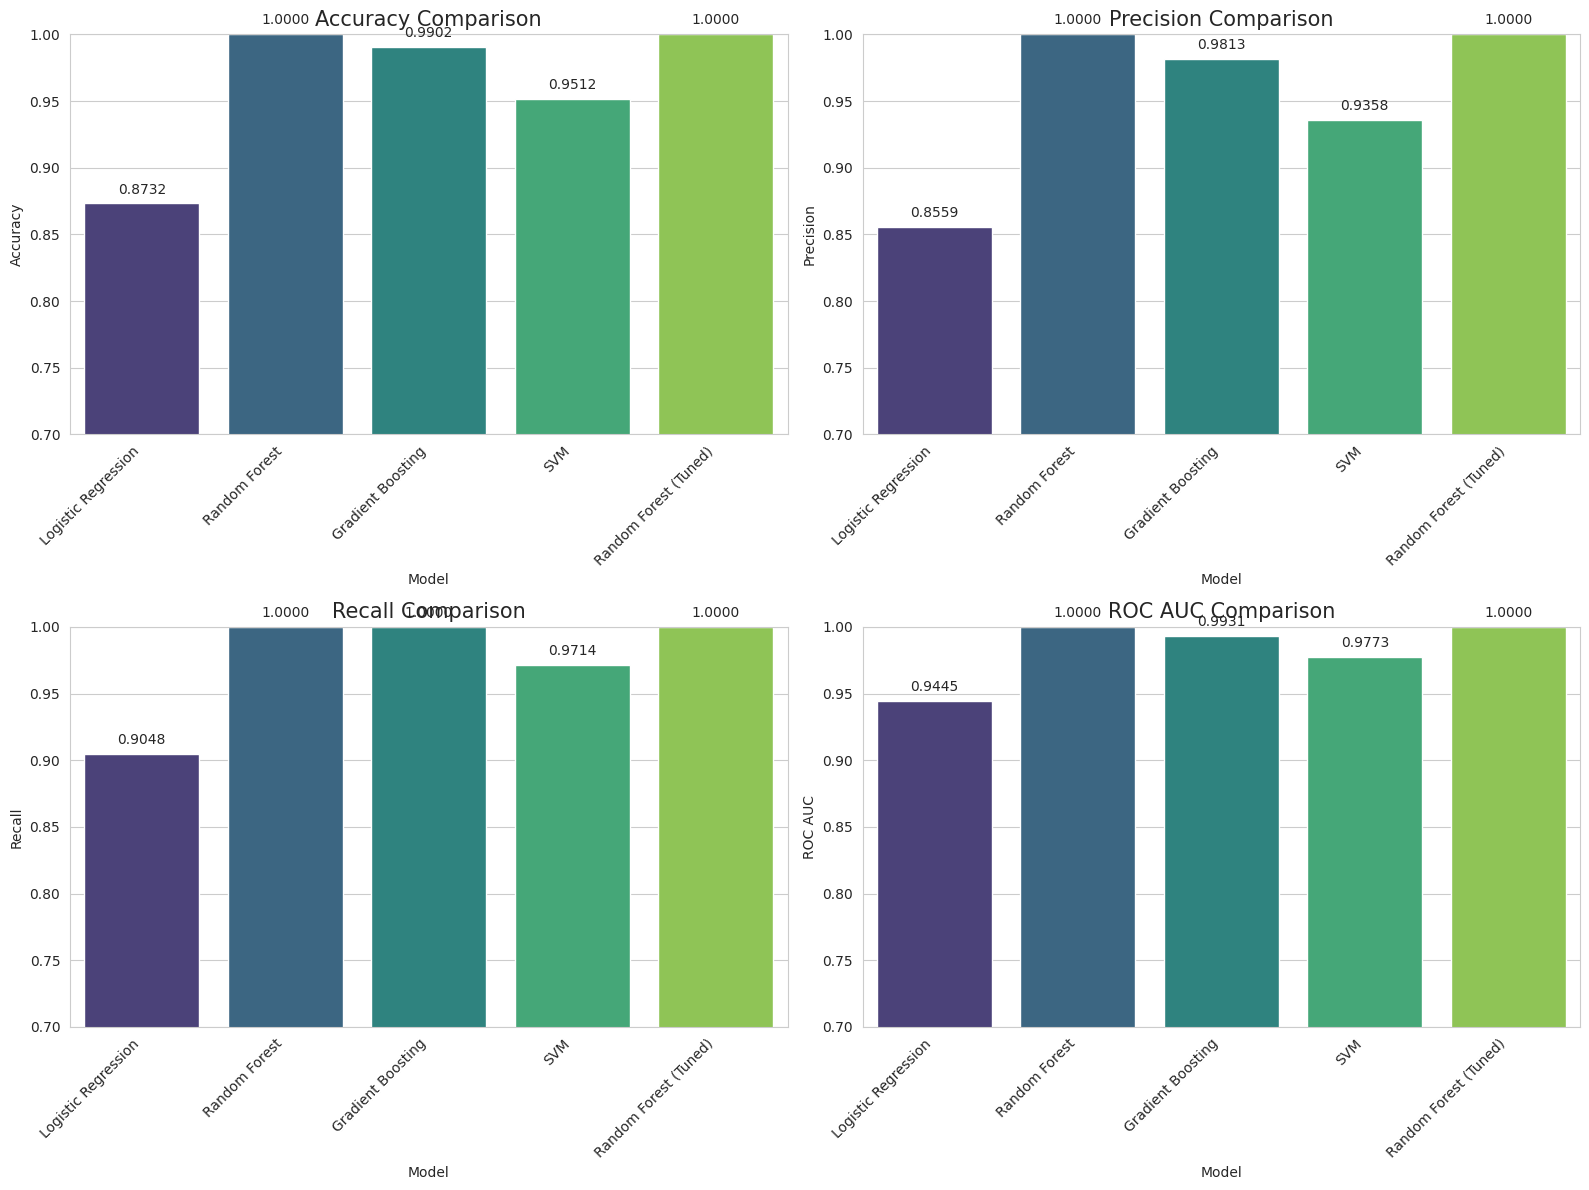

In [34]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
ax1 = sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Accuracy Comparison', fontsize=15)
plt.ylim([0.7, 1])
plt.xticks(rotation=45, ha='right')
for i, p in enumerate(ax1.patches):
    ax1.annotate(f'{p.get_height():.4f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.subplot(2, 2, 2)
ax2 = sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
plt.title('Precision Comparison', fontsize=15)
plt.ylim([0.7, 1])
plt.xticks(rotation=45, ha='right')
for i, p in enumerate(ax2.patches):
    ax2.annotate(f'{p.get_height():.4f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.subplot(2, 2, 3)
ax3 = sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
plt.title('Recall Comparison', fontsize=15)
plt.ylim([0.7, 1])
plt.xticks(rotation=45, ha='right')
for i, p in enumerate(ax3.patches):
    ax3.annotate(f'{p.get_height():.4f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.subplot(2, 2, 4)
ax4 = sns.barplot(x='Model', y='ROC AUC', data=metrics_df, palette='viridis')
plt.title('ROC AUC Comparison', fontsize=15)
plt.ylim([0.7, 1])
plt.xticks(rotation=45, ha='right')
for i, p in enumerate(ax4.patches):
    ax4.annotate(f'{p.get_height():.4f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

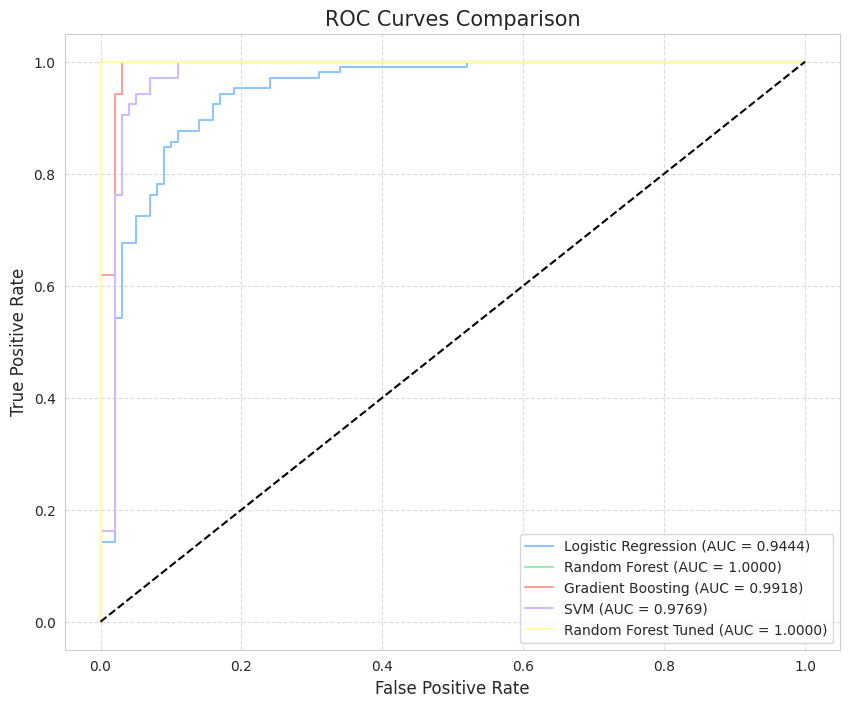

In [35]:
plt.figure(figsize=(10, 8))

# Logistic Regression
y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.4f})')

# Random Forest
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.4f})')

# Gradient Boosting
y_prob_gb = gb_pipeline.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_prob_gb):.4f})')

# SVM
y_prob_svm = svm_pipeline.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, y_prob_svm):.4f})')

# Tuned Random Forest
y_prob_best = best_model.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)
plt.plot(fpr_best, tpr_best, label=f'Random Forest Tuned (AUC = {roc_auc_score(y_test, y_prob_best):.4f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [36]:
# 6.4 Cross-validation pada model terbaik
print("\n====== CROSS-VALIDATION UNTUK MODEL TERBAIK ======")
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"ROC AUC scores: {cv_scores}")
print(f"Mean ROC AUC: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# 6.5 Formulasi metrik evaluasi dan penjelasannya
print("\n====== PENJELASAN METRIK EVALUASI ======")
print("""
1. Accuracy: Mengukur proporsi prediksi yang benar dari total prediksi.
   - Formula: (TP + TN) / (TP + TN + FP + FN)
   - Interpretasi: Semakin tinggi accuracy, semakin baik model dalam memprediksi secara keseluruhan.

2. Precision: Mengukur proporsi pasien yang diprediksi positif penyakit jantung dan benar-benar positif.
   - Formula: TP / (TP + FP)
   - Interpretasi: Semakin tinggi precision, semakin kecil kemungkinan false positive (memprediksi pasien sakit padahal sehat).

3. Recall/Sensitivity: Mengukur proporsi pasien dengan penyakit jantung yang berhasil diidentifikasi oleh model.
   - Formula: TP / (TP + FN)
   - Interpretasi: Semakin tinggi recall, semakin kecil kemungkinan false negative (tidak mendeteksi pasien yang sebenarnya sakit).

4. F1 Score: Rata-rata harmonik dari precision dan recall, memberikan keseimbangan antara kedua metrik tersebut.
   - Formula: 2 * (Precision * Recall) / (Precision + Recall)
   - Interpretasi: F1 score tinggi menunjukkan keseimbangan yang baik antara precision dan recall.

5. ROC AUC: Area di bawah kurva ROC, mengukur kemampuan model membedakan antara kelas positif dan negatif.
   - Range: 0.5 (tidak lebih baik dari random) hingga 1.0 (sempurna)
   - Interpretasi: Semakin tinggi AUC, semakin baik model dalam membedakan pasien dengan dan tanpa penyakit jantung.

Dalam konteks medis, recall/sensitivity sangat penting karena kita ingin meminimalkan false negative (tidak mendeteksi pasien yang sebenarnya sakit). Namun, precision juga penting untuk menghindari false alarm yang dapat menyebabkan kecemasan pasien dan pemeriksaan lebih lanjut yang tidak perlu.
""")


====== CROSS-VALIDATION UNTUK MODEL TERBAIK ======
ROC AUC scores: [1.        1.        1.        1.        0.9974271]
Mean ROC AUC: 0.9995
Standard Deviation: 0.0010

====== PENJELASAN METRIK EVALUASI ======

1. Accuracy: Mengukur proporsi prediksi yang benar dari total prediksi.
   - Formula: (TP + TN) / (TP + TN + FP + FN)
   - Interpretasi: Semakin tinggi accuracy, semakin baik model dalam memprediksi secara keseluruhan.

2. Precision: Mengukur proporsi pasien yang diprediksi positif penyakit jantung dan benar-benar positif.
   - Formula: TP / (TP + FP)
   - Interpretasi: Semakin tinggi precision, semakin kecil kemungkinan false positive (memprediksi pasien sakit padahal sehat).

3. Recall/Sensitivity: Mengukur proporsi pasien dengan penyakit jantung yang berhasil diidentifikasi oleh model.
   - Formula: TP / (TP + FN)
   - Interpretasi: Semakin tinggi recall, semakin kecil kemungkinan false negative (tidak mendeteksi pasien yang sebenarnya sakit).

4. F1 Score: Rata-rata harmonik

# 7. **Deployment (Demo)**

In [37]:
# 7.1 Fungsi untuk prediksi dengan data baru
def predict_heart_disease(data_dict, model=best_model):
    """
    Fungsi untuk memprediksi risiko penyakit jantung untuk data baru.

    Parameters:
    data_dict (dict): Dictionary dengan key berupa fitur dan value berupa nilai fitur
    model: Model machine learning yang digunakan untuk prediksi

    Returns:
    tuple: (prediction, probability) - prediksi (0/1) dan probabilitas kelas positif
    """
    # Buat DataFrame dari dictionary
    data = pd.DataFrame([data_dict])

    # Prediksi
    prediction = model.predict(data)[0]
    probability = model.predict_proba(data)[0][1]

    return prediction, probability

In [38]:
# 7.2 Contoh penggunaan (demo)
print("\n====== DEMO PREDIKSI ======")
print("Contoh penggunaan dengan data baru:")

# Contoh kasus 1: Pasien dengan risiko tinggi
sample_data_high_risk = {
    'age': 64,
    'sex': 1,  # 1 = male, 0 = female
    'cp': 3,   # chest pain type (3 = asymptomatic)
    'trestbps': 160,  # resting blood pressure
    'chol': 260,  # serum cholesterol
    'fbs': 1,  # fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
    'restecg': 2,  # resting electrocardiographic results
    'thalach': 124,  # maximum heart rate achieved
    'exang': 1,  # exercise induced angina (1 = yes, 0 = no)
    'oldpeak': 2.6,  # ST depression induced by exercise relative to rest
    'slope': 0,  # slope of the peak exercise ST segment
    'ca': 3,  # number of major vessels (0-3) colored by fluoroscopy
    'thal': 2  # thalassemia (2 = fixed defect)
}

# Contoh kasus 2: Pasien dengan risiko rendah
sample_data_low_risk = {
    'age': 34,
    'sex': 0,  # 1 = male, 0 = female
    'cp': 0,   # chest pain type (0 = typical angina)
    'trestbps': 118,  # resting blood pressure
    'chol': 180,  # serum cholesterol
    'fbs': 0,  # fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
    'restecg': 0,  # resting electrocardiographic results
    'thalach': 170,  # maximum heart rate achieved
    'exang': 0,  # exercise induced angina (1 = yes, 0 = no)
    'oldpeak': 0.2,  # ST depression induced by exercise relative to rest
    'slope': 2,  # slope of the peak exercise ST segment
    'ca': 0,  # number of major vessels (0-3) colored by fluoroscopy
    'thal': 1  # thalassemia (1 = normal)
}

# Prediksi untuk kasus 1
prediction1, probability1 = predict_heart_disease(sample_data_high_risk)
print("\nHasil prediksi untuk pasien risiko tinggi:")
print(f"Prediksi: {'Positif (Risiko Penyakit Jantung)' if prediction1 == 1 else 'Negatif (Tidak Ada Risiko Penyakit Jantung)'}")
print(f"Probabilitas risiko penyakit jantung: {probability1:.4f} ({probability1*100:.2f}%)")

# Prediksi untuk kasus 2
prediction2, probability2 = predict_heart_disease(sample_data_low_risk)
print("\nHasil prediksi untuk pasien risiko rendah:")
print(f"Prediksi: {'Positif (Risiko Penyakit Jantung)' if prediction2 == 1 else 'Negatif (Tidak Ada Risiko Penyakit Jantung)'}")
print(f"Probabilitas risiko penyakit jantung: {probability2:.4f} ({probability2*100:.2f}%)")


====== DEMO PREDIKSI ======
Contoh penggunaan dengan data baru:

Hasil prediksi untuk pasien risiko tinggi:
Prediksi: Negatif (Tidak Ada Risiko Penyakit Jantung)
Probabilitas risiko penyakit jantung: 0.4900 (49.00%)

Hasil prediksi untuk pasien risiko rendah:
Prediksi: Positif (Risiko Penyakit Jantung)
Probabilitas risiko penyakit jantung: 0.6600 (66.00%)
